In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('electronics.csv')

In [3]:
# list of first five rows
dataset.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [4]:
dataset.shape

(1292954, 10)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [6]:
#converting timestampm column datatype from int64 to datetime
from datetime import datetime
pd.to_datetime(dataset['timestamp'])

0         1999-06-13
1         1999-06-14
2         1999-06-17
3         1999-07-01
4         1999-07-06
             ...    
1292949   2018-09-26
1292950   2018-09-26
1292951   2018-09-26
1292952   2018-09-29
1292953   2018-10-01
Name: timestamp, Length: 1292954, dtype: datetime64[ns]

In [7]:
#converting product id datatype to string
dataset['brand'] = dataset['brand'].astype(str)

In [8]:
#converting category datatype to string
dataset['category'] = dataset['category'].astype(str)

In [9]:
#converting rating datatype into float
dataset['rating'] = dataset['rating'].astype(float)

In [10]:
#converting userid datatype into string
dataset['user_id'] = dataset['user_id'].astype(str)

In [11]:
#converting item id datatype into string
dataset['item_id'] = dataset['item_id'].astype(str)

In [12]:
# we can also see the statistical summary of the dataset.
dataset.describe()

,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.051482e+00,2.012938e+03,1.747587e-01
std,1.379732e+00,2.643513e+00,5.506810e-01
min,1.000000e+00,1.999000e+03,0.000000e+00
25%,4.000000e+00,2.012000e+03,0.000000e+00
50%,5.000000e+00,2.014000e+03,0.000000e+00
75%,5.000000e+00,2.015000e+03,0.000000e+00
max,5.000000e+00,2.018000e+03,2.000000e+00


In [13]:
#total number of unique values
dataset.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
user_attr           2
split               3
dtype: int64

In [15]:
# drop all duplicate and null values in rating category
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)

In [22]:
# check for duplicates
print(dataset.duplicated().sum()," duplicate")

0  duplicate


In [26]:
#checkking for null values
print(dataset.isnull().sum()," null")

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
dtype: int64  null


<AxesSubplot:xlabel='rating', ylabel='count'>

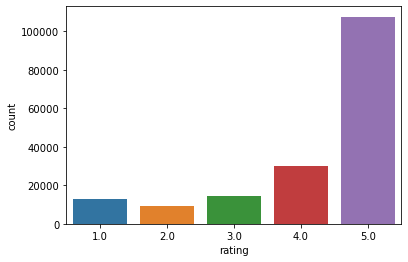

In [27]:
# the distribution of ratings 
sns.countplot(x='rating', data=dataset)

<AxesSubplot:xlabel='year'>

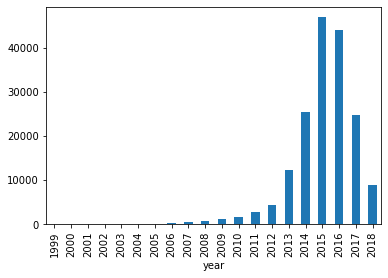

In [28]:
#best year of sales
dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year #getting year from timstamp
dataset.groupby('year')['rating'].count().plot(kind='bar')

In [29]:
#most sold brand in 2015
data_2015 = dataset[dataset['year']==2015]

<AxesSubplot:xlabel='brand'>

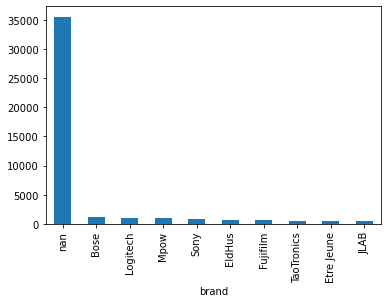

In [30]:
data_2015.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<AxesSubplot:xlabel='year'>

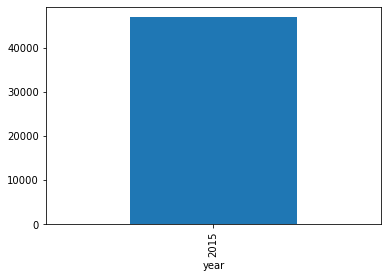

In [31]:
#How much was made in sales in the year 2015
data_2015.groupby('year')['rating'].count().plot(kind='bar')

<AxesSubplot:xlabel='month'>

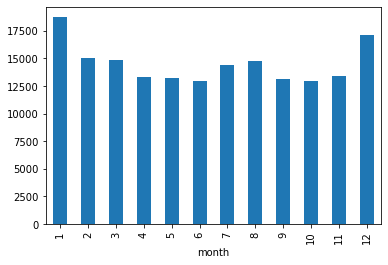

In [32]:
# what was the best month of sales
dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month
dataset.groupby('month')['rating'].count().plot(kind='bar')

<AxesSubplot:xlabel='brand'>

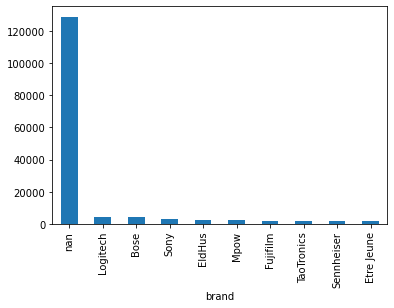

In [33]:
# What product by brand name sold the most?
dataset.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<AxesSubplot:xlabel='category'>

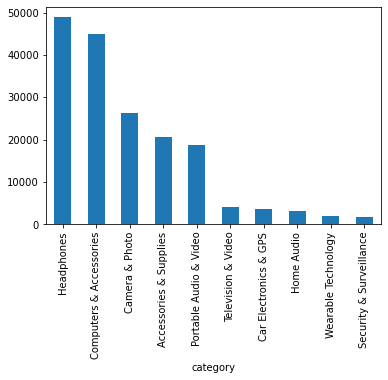

In [34]:
# What product by category sold the most?
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<AxesSubplot:xlabel='brand'>

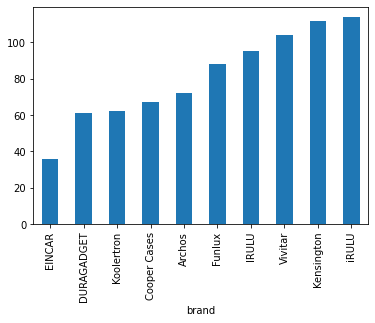

In [35]:
# What product by brand name sold the least?
dataset.groupby('brand')['rating'].count().sort_values(ascending=True).head(10).plot(kind='bar')

<AxesSubplot:xlabel='category'>

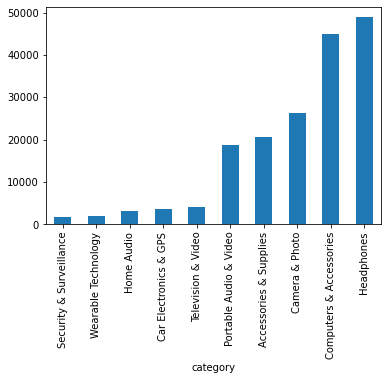

In [36]:
# What product by category sold the least?
dataset.groupby('category')['rating'].count().sort_values(ascending=True).head(10).plot(kind='bar')

<AxesSubplot:ylabel='rating'>

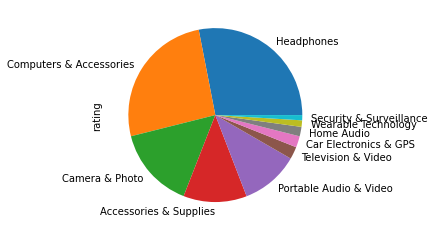

In [39]:
# category percentage sales
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

<AxesSubplot:ylabel='rating'>

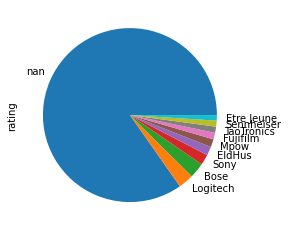

In [40]:
# brand percentage sales
dataset.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')   